In [1]:
# import statements

#import sys
import os
import glob
import numpy as np
import math, scipy
import matplotlib 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import cm
from matplotlib.ticker import MultipleLocator

%matplotlib inline

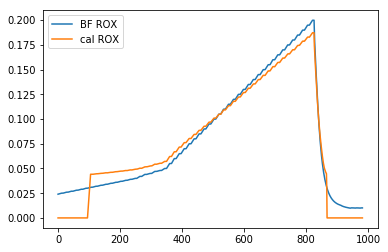

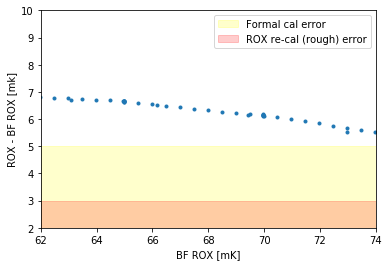

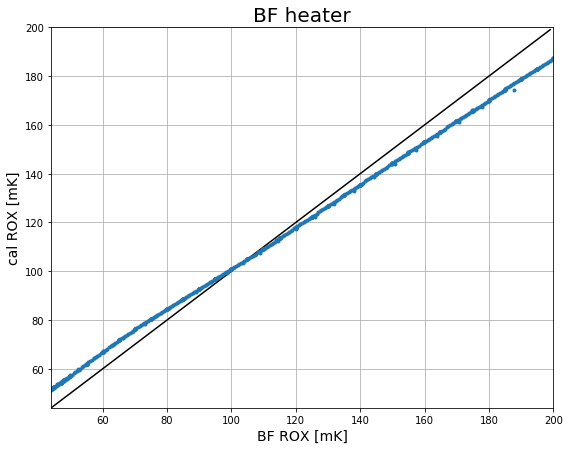

In [2]:
# heating with the BF heater 

BFheater = np.loadtxt('grafana_data_export.csv',delimiter=';',skiprows=1,usecols=[1,2])

plt.plot(BFheater[:,0],label='BF ROX')
plt.plot(BFheater[:,1],label='cal ROX')
plt.legend()
plt.show()

plt.plot(BFheater[:,0]*1000.,(BFheater[:,1]-BFheater[:,0])*1000.,
         marker='.',linestyle='None')
plt.xlabel('BF ROX [mK]')
plt.ylabel('ROX - BF ROX [mk]')
plt.axhspan(-5,5,color='yellow',alpha=0.2,label='Formal cal error')
plt.axhspan(0,3,color='red',alpha=0.2,label='ROX re-cal (rough) error')
#plt.xlim(44,150)
#plt.ylim(-10,10)
plt.xlim(62,74)
plt.ylim(2,10)
plt.legend()
plt.show()

plt.figure(figsize=(9,7))
# plot guideline
plt.plot(np.arange(25,200),np.arange(25,200),color='black')
plt.plot(BFheater[:,0]*1000.,BFheater[:,1]*1000.,marker='.',linestyle='None')
plt.grid()
plt.xlabel('BF ROX [mK]',fontsize=14)
plt.ylabel('cal ROX [mK]',fontsize=14)
plt.xlim(44,200)
plt.ylim(44,200)
plt.title('BF heater',fontsize=20)
plt.show()

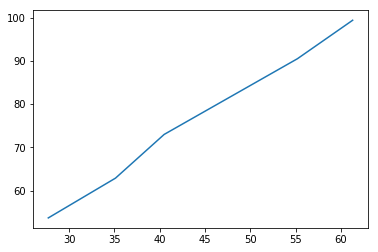

In [3]:
# heating with our heater

ls_ourheater = [53.7,62.9,73,90.5,99.4]
bf_ourheater = [27.7,35.12,40.49,55.2,61.3]

plt.plot(bf_ourheater,ls_ourheater)
plt.show()

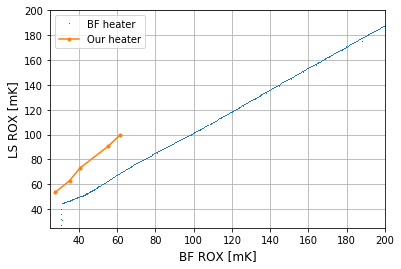

In [4]:
plt.plot(BFheater[:,0]*1000.,BFheater[:,1]*1000.,marker=',',linestyle='None',label='BF heater')
plt.plot(bf_ourheater,ls_ourheater,label='Our heater',marker='.')
plt.grid()
plt.xlabel('BF ROX [mK]',fontsize=12)
plt.ylabel('LS ROX [mK]',fontsize=12)
plt.xlim(25,200)
plt.ylim(25,200)
plt.legend()
plt.show()

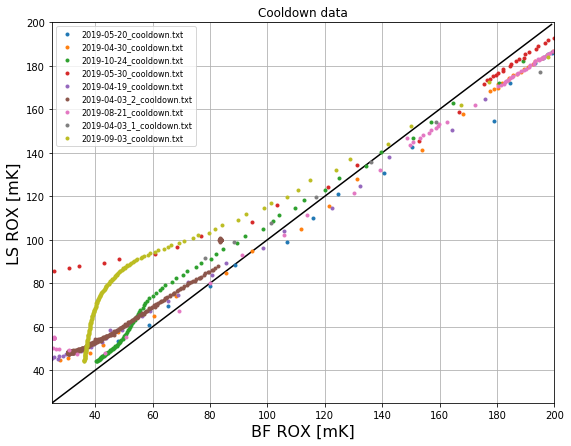

In [5]:
## plot the cooldown data
cdown = glob.glob('*cooldown.txt')

plt.figure(figsize=(9,7))

# plot guideline
plt.plot(np.arange(25,200),np.arange(25,200),color='black')

# plot data
for i in [0,1,2,3,5,6,7,9,10]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',label=cdown[i])
plt.grid()
plt.xlabel('BF ROX [mK]',fontsize=16)
plt.ylabel('LS ROX [mK]',fontsize=16)
plt.xlim(25,200)
plt.ylim(25,200)
plt.legend(fontsize=8,markerscale=1.0)
plt.title('Cooldown data')
plt.show()







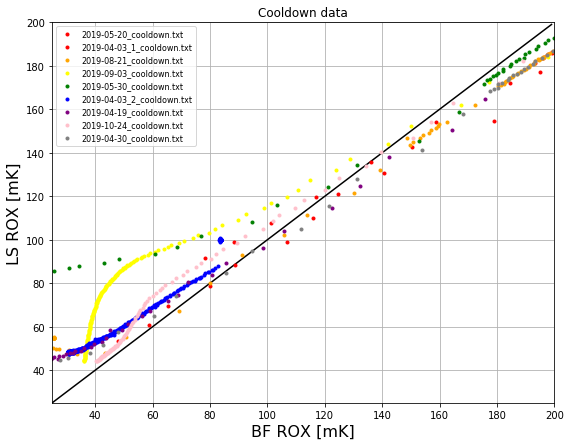

In [6]:
## plot the cooldown data
cdown = glob.glob('*cooldown.txt')

plt.figure(figsize=(9,7))

# plot guideline
plt.plot(np.arange(25,200),np.arange(25,200),color='black')

# plot data
#for i in [0,1,2,3,5,6,7,9,10]:
#    cdowndat = np.loadtxt(cdown[i],skiprows=5)
#    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',label=cdown[i])
for i in [0,9]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='red',label=cdown[i])
for i in [7]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='orange',label=cdown[i])
for i in [10]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='yellow',label=cdown[i])    
for i in [3]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='green',label=cdown[i])        
for i in [6]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='blue',label=cdown[i]) 
for i in [5]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='purple',label=cdown[i])   
for i in [2]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='pink',label=cdown[i]) 
for i in [1]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='grey',label=cdown[i])
    
plt.grid()
plt.xlabel('BF ROX [mK]',fontsize=16)
plt.ylabel('LS ROX [mK]',fontsize=16)
plt.xlim(25,200)
plt.ylim(25,200)
plt.legend(fontsize=8,markerscale=1.0)
plt.title('Cooldown data')
plt.show()

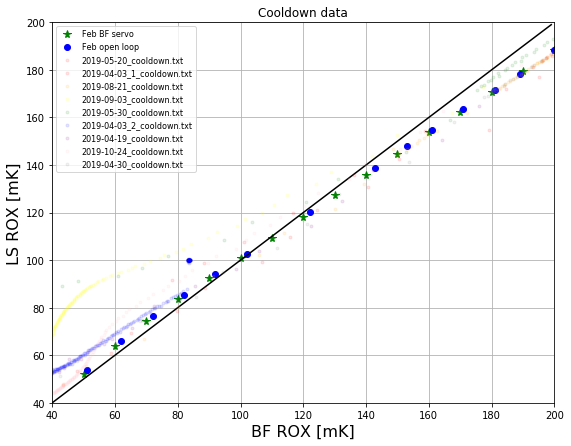

In [7]:

plt.figure(figsize=(9,7))

# Plot data from heater with LS right below BF, after heat sinking
LS = [52,64,74.6,83.5,92.3,100.8,109.2,118.3,127.3,135.7,144.8,153.7,162.3,170.8,179.5,188.2]
BF = [50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
plt.plot(BF,LS,color='green',linestyle='None',marker='*',markersize=8,label='Feb BF servo')

OL_LS = [53.8,65.9,76.4,85.3,94,102.5,120.3,138.8,147.9,154.6,163.5,171.7,178.4,188.3]
OL_BF = [51,62,72,82,92,102,122,143,153,161,171,181,189,200]
plt.plot(OL_BF,OL_LS,color='blue',linestyle='None',marker='o',markersize=6,label='Feb open loop')

## plot the cooldown data
cdown = glob.glob('*cooldown.txt')



# plot guideline
plt.plot(np.arange(25,200),np.arange(25,200),color='black')

# plot data
#for i in [0,1,2,3,5,6,7,9,10]:
#    cdowndat = np.loadtxt(cdown[i],skiprows=5)
#    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',label=cdown[i])
al = 0.1
for i in [0,9]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='red',alpha=al,label=cdown[i])
for i in [7]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='orange',alpha=al,label=cdown[i])
for i in [10]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='yellow',alpha=al,label=cdown[i])    
for i in [3]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='green',alpha=al,label=cdown[i])        
for i in [6]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='blue',alpha=al,label=cdown[i]) 
for i in [5]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='purple',alpha=al,label=cdown[i])   
for i in [2]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='pink',alpha=al,label=cdown[i]) 
for i in [1]:
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',color='grey',alpha=al,label=cdown[i])

plt.grid()
plt.xlabel('BF ROX [mK]',fontsize=16)
plt.ylabel('LS ROX [mK]',fontsize=16)
plt.xlim(40,200)
plt.ylim(40,200)
#plt.xlim(40,100)
#plt.ylim(40,100)
plt.legend(fontsize=8,markerscale=1.0)
plt.title('Cooldown data')
plt.show()

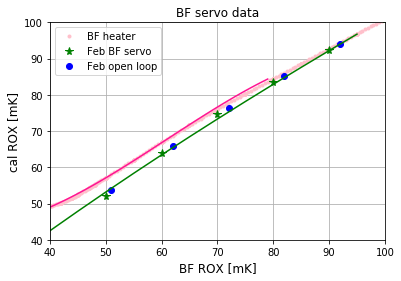

In [55]:
plt.plot(BFheater[110:800,0]*1000.,BFheater[110:800,1]*1000.,marker='.',color='pink',linestyle='None',label='BF heater')
plt.plot(BF,LS,color='green',linestyle='None',marker='*',markersize=8,label='Feb BF servo')
plt.plot(OL_BF,OL_LS,color='blue',linestyle='None',marker='o',markersize=6,label='Feb open loop')
plt.grid()
plt.xlabel('BF ROX [mK]',fontsize=12)
plt.ylabel('cal ROX [mK]',fontsize=12)
#plt.xlim(25,200)
#plt.ylim(25,200)
plt.xlim(40,100)
plt.ylim(40,100)
plt.title('BF servo data')


fitpars = np.polyfit(BF,LS,3)
xes = np.arange(40,100,5)
yes = fitpars[0]*xes**3 + fitpars[1]*xes**2 + fitpars[2]*xes + fitpars[3]
plt.plot(xes,yes,color='green')

fitpars = np.polyfit(BFheater[110:400,0]*1000.,BFheater[110:400,1]*1000.,3)
xes=np.arange(25,80)
yes = fitpars[0]*xes**3 + fitpars[1]*xes**2 + fitpars[2]*xes + fitpars[3]
plt.plot(xes,yes,color='DeepPink')
plt.legend()
plt.show()

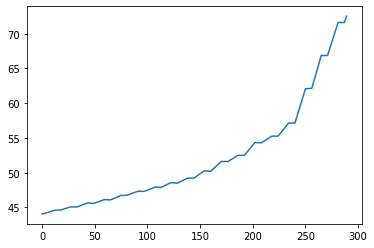

In [54]:
plt.plot(BFheater[110:400,1]*1000.)

In [24]:
for x in [50,60,70,80]:
    ii = np.where((abs(BFheater[:,0]*1000. - x)<0.05))[0]
    print(x, np.mean(BFheater[ii,1])*1000.)

50 57.197370999233634
60 66.87028565613493
70 76.11805212482149
80 84.45439488714987


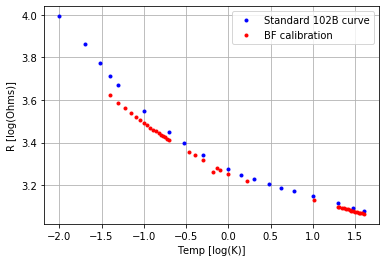

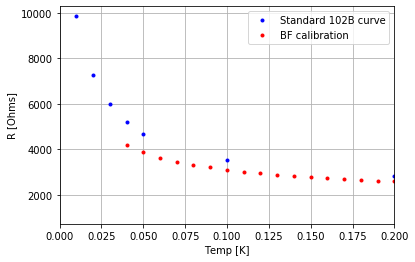

In [17]:
# LS 102B calibration
T_102b = [0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.5,1,1.4,2,3,4.2,6,10,20,30,40]
R_102b = [9856.38,7289.79,5975.92,5184.10,4676.87,3548.94,2813.75,2502.26,
    2187.50,1884.56,1779.33,1691.44,1606.45,1546.44,1488.89,1410.19,1300.92,1239.54,1198.80]

T_bf = [20.7,21.9,23.2,24.5,25.8,27.2,28.7,30.2,31.7,33.3,34.9,36.5,38.2,39.9,
        19.8,10.3,1.67,1.0,0.8,0.73,0.66,0.505,
        0.404,0.34,0.2,0.19,0.18,0.17,0.16,0.15,0.14,0.13,0.12,0.11,0.1,0.09,0.08,0.07,0.06,0.05,0.04]
R_bf = [3.09713,3.09437,3.09155,3.08889,3.08637,3.08379,3.08118,3.0787,3.07634,3.07396,3.07169,3.06953,3.06734,
        3.06526,3.0993,3.13096,3.21781,3.25468,3.27368,3.28192,3.26127,3.31718,3.33965,3.35736,3.41308,3.41859,
       3.42445,3.43069,3.43737,3.44457,3.45237,3.46088,3.47025,3.48067,3.49239,3.50575,3.5212,3.53941,
        3.56133,3.58835,3.62266]
plt.plot(np.log10(T_102b), np.log10(R_102b),'b.',label='Standard 102B curve')
plt.plot(np.log10(T_bf),R_bf,'r.',label='BF calibration')
#plt.ylim(3.0,3.2)
#plt.xlim(1,2)
plt.xlabel('Temp [log(K)]')
plt.ylabel('R [log(Ohms)]')
plt.legend()
plt.grid()
plt.show()

plt.plot(T_102b, R_102b,'b.',label='Standard 102B curve')
plt.plot(T_bf,10**np.array(R_bf),'r.',label='BF calibration')
#plt.ylim(3.0,3.2)
#plt.xlim(1,2)
plt.xlabel('Temp [K]')
plt.ylabel('R [Ohms]')
plt.xlim(0,0.2)
plt.legend()
plt.grid()

[1.57204238e+09 1.89200000e-01 1.82200000e-01]
[1.55440561e+09 1.58900000e-01 1.54300000e-01]
[1.5720425e+09 1.6460000e-01 1.6290000e-01]
[1.56899432e+09 1.64400000e-01 1.56000000e-01]
[1.55865539e+09 1.95900000e-01 1.83800000e-01]
[1.56655527e+09 1.95900000e-01 1.83700000e-01]
[1.56615818e+09 1.44900000e-01 1.39800000e-01]
[1.55588058e+09 7.24000000e-02 8.06000000e-02]
[1.55536834e+09 8.35000000e-02 1.00000000e-01]


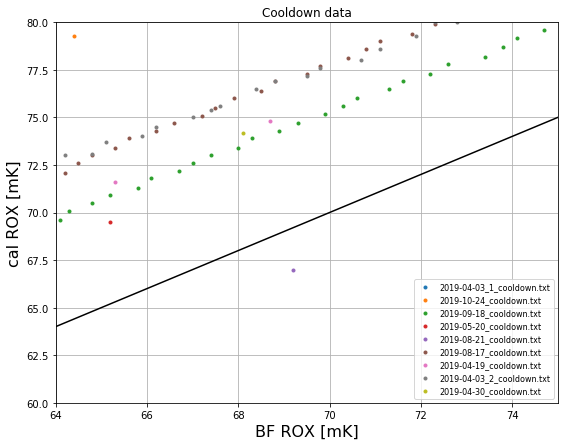

In [8]:
plt.figure(figsize=(9,7))

# plot guideline
plt.plot(np.arange(25,200),np.arange(25,200),color='black')

# plot data
for i in [0,1,2,3,5,6,7,9,10]:
    print(cdowndat[i])
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',linestyle='None',label=cdown[i])
plt.grid()
plt.xlabel('BF ROX [mK]',fontsize=16)
plt.ylabel('cal ROX [mK]',fontsize=16)
plt.xlim(64,75)
plt.ylim(60,80)
plt.legend(fontsize=8,markerscale=1.0)
plt.title('Cooldown data')
plt.show()


2019-08-09_servo.txt
2019-04-03_2_servo.txt
2019-04-03_3_servo.txt
2019-04-19_servo.txt
2019-04-03_1_servo.txt
2019-10-24_servo.txt
2019-08-21_servo.txt
2019-09-18_servo.txt
2019-04-30_servo.txt


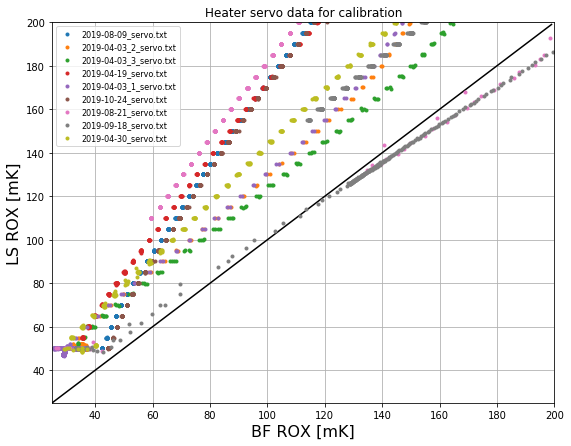

In [8]:
## plot the servo data
servo = glob.glob('*servo.txt')

plt.figure(figsize=(9,7))

# plot guideline
plt.plot(np.arange(25,200),np.arange(25,200),color='black')

# plot the data
for i in [0,1,2,3,4,5,6,7,8]:
    print(servo[i])
    servodat = np.loadtxt(servo[i],skiprows=5)
    plt.plot(1000.*servodat[:,1],1000.*servodat[:,2],marker='.',linestyle='None',label=servo[i])
plt.grid()
plt.xlabel('BF ROX [mK]',fontsize=16)
plt.ylabel('LS ROX [mK]',fontsize=16)
plt.xlim(25,200)
plt.ylim(25,200)
plt.legend(fontsize=8,markerscale=1.0)
plt.title('Heater servo data for calibration')
plt.show()

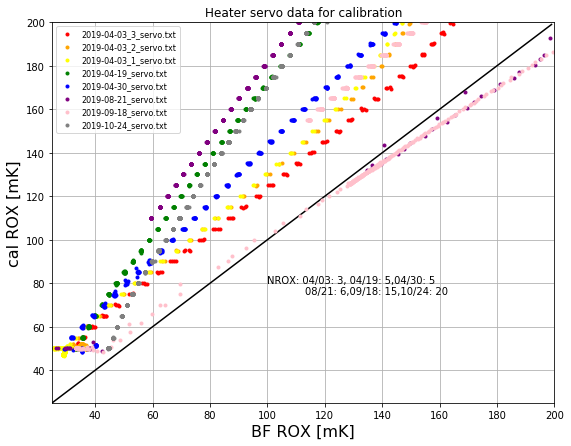

In [19]:
# color by N ROXes

## plot the servo data
servo = glob.glob('*servo.txt')

plt.figure(figsize=(9,7))

# plot guideline
plt.plot(np.arange(25,200),np.arange(25,200),color='black')

# plot the data
#for i in [0,1,2,3,4,5,6,7,8]:
#    print(servo[i])
#    servodat = np.loadtxt(servo[i],skiprows=5)
#    plt.plot(1000.*servodat[:,1],1000.*servodat[:,2],marker='.',linestyle='None',label=servo[i])

for i in [2]:
    servodat = np.loadtxt(servo[i],skiprows=5)
    plt.plot(1000.*servodat[:,1],1000.*servodat[:,2],marker='.',linestyle='None',color='red',label=servo[i])
for i in [4]:
    servodat = np.loadtxt(servo[i],skiprows=5)
    plt.plot(1000.*servodat[:,1],1000.*servodat[:,2],marker='.',linestyle='None',color='orange',label=servo[i])
for i in [5]:
    servodat = np.loadtxt(servo[i],skiprows=5)
    plt.plot(1000.*servodat[:,1],1000.*servodat[:,2],marker='.',linestyle='None',color='yellow',label=servo[i])
for i in [0]:
    servodat = np.loadtxt(servo[i],skiprows=5)
    plt.plot(1000.*servodat[:,1],1000.*servodat[:,2],marker='.',linestyle='None',color='green',label=servo[i])
for i in [7]:
    servodat = np.loadtxt(servo[i],skiprows=5)
    plt.plot(1000.*servodat[:,1],1000.*servodat[:,2],marker='.',linestyle='None',color='blue',label=servo[i])   
for i in [3]:
    servodat = np.loadtxt(servo[i],skiprows=5)
    plt.plot(1000.*servodat[:,1],1000.*servodat[:,2],marker='.',linestyle='None',color='purple',label=servo[i])     
for i in [1]:
    servodat = np.loadtxt(servo[i],skiprows=5)
    plt.plot(1000.*servodat[:,1],1000.*servodat[:,2],marker='.',linestyle='None',color='pink',label=servo[i])
for i in [6]:
    servodat = np.loadtxt(servo[i],skiprows=5)
    plt.plot(1000.*servodat[:,1],1000.*servodat[:,2],marker='.',linestyle='None',color='grey',label=servo[i]) 

plt.text(100,80,'NROX: 04/03: 3, 04/19: 5,04/30: 5')
plt.text(113,75,'08/21: 6,09/18: 15,10/24: 20')
plt.grid()
plt.xlabel('BF ROX [mK]',fontsize=16)
plt.ylabel('cal ROX [mK]',fontsize=16)
plt.xlim(25,200)
plt.ylim(25,200)
plt.legend(fontsize=8,markerscale=1.0)
plt.title('Heater servo data for calibration')
plt.show()

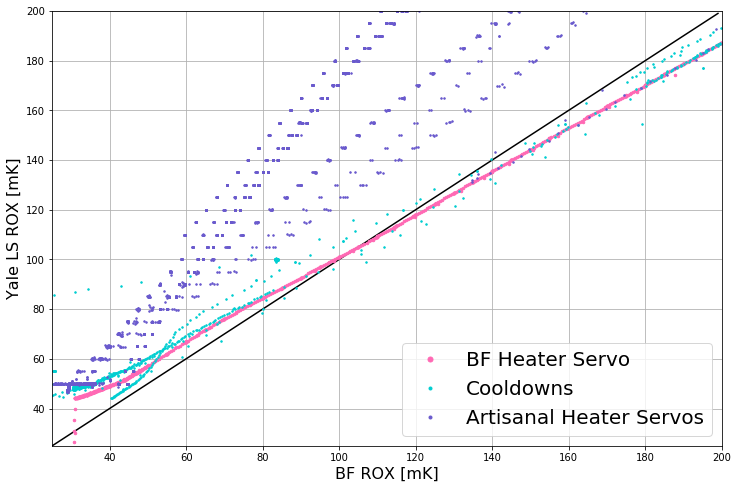

In [4]:
plt.figure(figsize=(12,8))

# plot guideline
plt.plot(np.arange(25,200),np.arange(25,200),color='black')

## plot the BF heater data
plt.plot(BFheater[:,0]*1000.,BFheater[:,1]*1000.,marker='.',ms=5,linestyle='None',label='BF Heater Servo',color='HotPink')

## plot the data with our heater
#plt.plot(bf_ourheater,ls_ourheater,label='Our heater',color='DarkOrange',marker='.',ms=12)

## plot the cooldown data
cdown = glob.glob('*cooldown.txt')
for i in [0,1,2,3,5,6,7,9]:
  #  print(cdowndat[i])
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',ms=3,linestyle='None',color='DarkTurquoise')
for i in [9]:
 #   print(cdowndat[i])
    cdowndat = np.loadtxt(cdown[i],skiprows=5)
    plt.plot(1000.*cdowndat[:,1],1000.*cdowndat[:,2],marker='.',ms=3,linestyle='None',color='DarkTurquoise',label='Cooldowns')    


## plot the servo data
servo = glob.glob('*servo.txt')
for i in [0,2,3,4,5,6]:
#    print(servo[i])
    servodat = np.loadtxt(servo[i],skiprows=5)
    plt.plot(1000.*servodat[:,1],1000.*servodat[:,2],marker='.',ms=3,linestyle='None',color='SlateBlue')
for i in [8]:
 #   print(servo[i])
    servodat = np.loadtxt(servo[i],skiprows=5)
    plt.plot(1000.*servodat[:,1],1000.*servodat[:,2],marker='.',ms=3,linestyle='None',color='SlateBlue',label='Artisanal Heater Servos')



plt.grid()
plt.xlabel('BF ROX [mK]',fontsize=16)
plt.ylabel('Yale LS ROX [mK]',fontsize=16)
plt.xlim(25,200)
plt.ylim(25,200)
plt.legend(fontsize=20,markerscale=2.0)
plt.show()